**Wind Speed Prediction Dataset**

DATE (YYYY-MM-DD)

WIND: Average wind speed [knots]

IND: First indicator value

RAIN: Precipitation Amount (mm)

IND.1: Second indicator value

T.MAX: Maximum Temperature (°C)

IND.2: Third indicator value

T.MIN: Minimum Temperature (°C)

T.MIN.G: Grass Minimum Temperature (°C)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wind_dataset.csv")

In [3]:
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,01-01-1961,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,02-01-1961,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,03-01-1961,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,04-01-1961,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,05-01-1961,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [4]:
df.tail()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
6570,27-12-1978,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6571,28-12-1978,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6572,29-12-1978,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6573,30-12-1978,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5
6574,31-12-1978,19.25,0,0.5,0.0,1.2,1.0,-1.5,-3.0


In [5]:
df.shape

(6575, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6575 non-null   object 
 1   WIND     6575 non-null   float64
 2   IND      6575 non-null   int64  
 3   RAIN     6575 non-null   float64
 4   IND.1    6514 non-null   float64
 5   T.MAX    5954 non-null   float64
 6   IND.2    6514 non-null   float64
 7   T.MIN    5902 non-null   float64
 8   T.MIN.G  6215 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


Handling duplicate values

In [7]:
df.duplicated().sum()      ## Checking for duplicate rows

4

In [8]:
df.drop_duplicates(keep='first')        ## Dropping duplicate rows and keeping only first duplicate row

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,01-01-1961,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,02-01-1961,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,03-01-1961,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,04-01-1961,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,05-01-1961,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...,...
6570,27-12-1978,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6571,28-12-1978,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6572,29-12-1978,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6573,30-12-1978,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5


Handling missing values

In [9]:
df.isna().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      673
T.MIN.G    360
dtype: int64

In [10]:
df.columns

Index(['DATE', 'WIND', 'IND', 'RAIN', 'IND.1', 'T.MAX', 'IND.2', 'T.MIN',
       'T.MIN.G'],
      dtype='object')

In [11]:
for i in ['IND.1', 'T.MAX', 'IND.2', 'T.MIN','T.MIN.G']:
  print(i, df[i].nunique())

IND.1 4
T.MAX 246
IND.2 5
T.MIN 247
T.MIN.G 283


<Axes: xlabel='IND.1', ylabel='Count'>

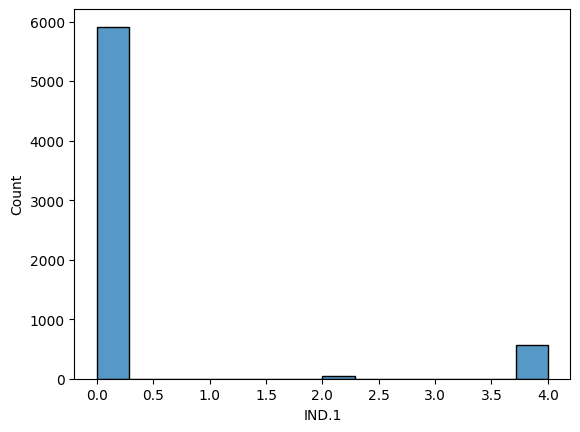

In [12]:
sns.histplot(df['IND.1'])

In [13]:
df['IND.1'].min()

0.0

In [14]:
df['IND.1'].max()

4.0

In [15]:
mean_ind1 = df['IND.1'].mean()

In [16]:
df['IND.1'].fillna(value=mean_ind1, inplace=True)

In [17]:
df.isna().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1        0
T.MAX      621
IND.2       61
T.MIN      673
T.MIN.G    360
dtype: int64

<Axes: xlabel='IND.2', ylabel='Count'>

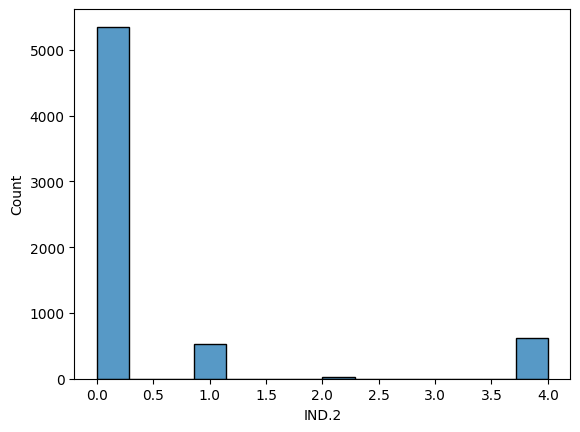

In [18]:
sns.histplot(df['IND.2'])

In [19]:
df['IND.2'].min()

0.0

In [20]:
df['IND.2'].max()


4.0

In [21]:
mean_ind2 = df['IND.2'].mean()

In [22]:
df['IND.2'].fillna(value=mean_ind2, inplace=True)

In [23]:
df.isna().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1        0
T.MAX      621
IND.2        0
T.MIN      673
T.MIN.G    360
dtype: int64

<Axes: xlabel='T.MAX', ylabel='Count'>

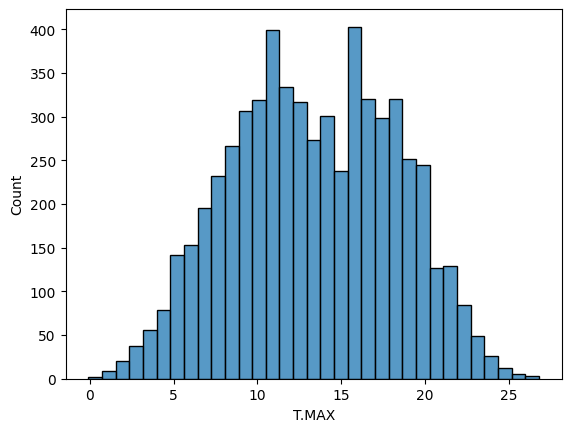

In [24]:
sns.histplot(df['T.MAX'])

In [25]:
median_T_MAX = df['T.MAX'].median()

In [26]:
df['T.MAX'].fillna(value=median_T_MAX, inplace=True)

In [27]:
df.isna().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1        0
T.MAX        0
IND.2        0
T.MIN      673
T.MIN.G    360
dtype: int64

<Axes: xlabel='T.MIN', ylabel='Count'>

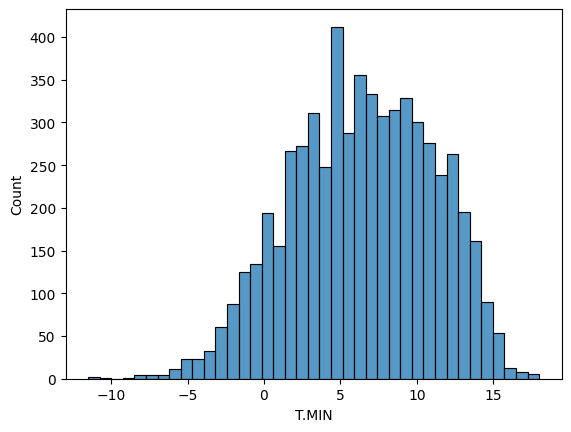

In [28]:
sns.histplot(df['T.MIN'])

In [29]:
df['T.MIN'].median()

6.5

In [30]:
median_T_MIN = df['T.MIN'].median()

In [31]:
df['T.MIN'].fillna(value=median_T_MIN, inplace=True)

<Axes: xlabel='T.MIN.G', ylabel='Count'>

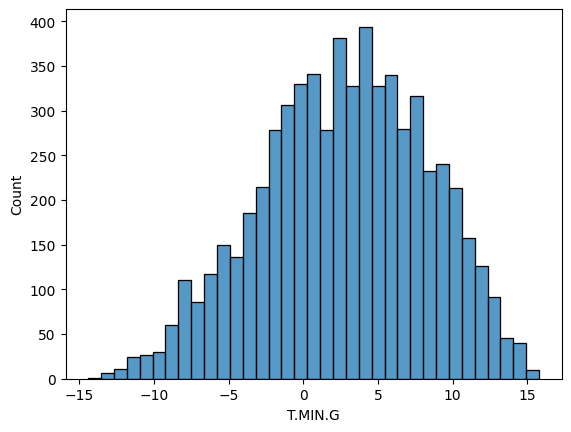

In [32]:
sns.histplot(df['T.MIN.G'])

In [33]:
df['T.MIN.G'].median()

3.0

In [34]:
median_T_MIN_G = df['T.MIN.G'].median()

In [35]:
df['T.MIN.G'].fillna(value=median_T_MIN_G, inplace=True)

In [36]:
df.isna().sum()

DATE       0
WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64